# Taking Dataset

In [1]:
import pandas as pd
df = pd.read_csv('people-vaccinated-covid.csv',index_col = 'Day',parse_dates = True)

In [2]:
df.describe()

,people_vaccinated
count,1.281900e+04
mean,1.440321e+07
std,5.509177e+07
min,0.000000e+00
25%,7.856400e+04
50%,5.816380e+05
75%,3.414282e+06
max,8.072946e+08


In [3]:
df.head()

,Entity,Code,people_vaccinated
Day,,,
2021-02-22,Afghanistan,AFG,0
2021-02-28,Afghanistan,AFG,8200
2021-03-16,Afghanistan,AFG,54000
2021-04-07,Afghanistan,AFG,120000
2021-04-22,Afghanistan,AFG,240000


In [4]:
print('Shape of the data',df.shape)

Shape of the data (12819, 3)


In [5]:
df

,Entity,Code,people_vaccinated
Day,,,
2021-02-22,Afghanistan,AFG,0
2021-02-28,Afghanistan,AFG,8200
2021-03-16,Afghanistan,AFG,54000
2021-04-07,Afghanistan,AFG,120000
2021-04-22,Afghanistan,AFG,240000
...,...,...,...
2021-05-21,Zimbabwe,ZWE,624665
2021-05-22,Zimbabwe,ZWE,630348
2021-05-23,Zimbabwe,ZWE,632496


# Creating the Columns

In [6]:
df = df.sort_values('Entity')

In [7]:
df

,Entity,Code,people_vaccinated
Day,,,
2021-02-22,Afghanistan,AFG,0
2021-02-28,Afghanistan,AFG,8200
2021-03-16,Afghanistan,AFG,54000
2021-04-07,Afghanistan,AFG,120000
2021-04-22,Afghanistan,AFG,240000
...,...,...,...
2021-03-18,Zimbabwe,ZWE,40002
2021-03-17,Zimbabwe,ZWE,39607
2021-03-16,Zimbabwe,ZWE,39550


In [8]:
df['eid'] = (df.groupby(['Entity']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()

In [9]:
ndf = df.loc[df['eid']==90]

In [10]:
ndf

,Entity,Code,people_vaccinated,eid
Day,,,,
2021-04-13,India,IND,97301914,90
2021-04-10,India,IND,88885961,90
2021-04-11,India,IND,91587400,90
2021-04-12,India,IND,95043039,90
2021-04-14,India,IND,100179199,90
...,...,...,...,...
2021-02-28,India,IND,11845075,90
2021-03-01,India,IND,12256337,90
2021-03-02,India,IND,12906771,90


In [11]:
sndf = ndf.sort_values('people_vaccinated')

In [12]:
sndf

,Entity,Code,people_vaccinated,eid
Day,,,,
2021-01-15,India,IND,0,90
2021-01-16,India,IND,191181,90
2021-01-17,India,IND,224301,90
2021-01-18,India,IND,454049,90
2021-01-19,India,IND,674835,90
...,...,...,...,...
2021-05-23,India,IND,150033188,90
2021-05-24,India,IND,152301505,90
2021-05-25,India,IND,153511379,90


In [13]:
val = sndf['people_vaccinated'].values

# Making Time Series Stationary

In [14]:
import numpy as np

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [16]:
import matplotlib.pyplot as plt

In [17]:
plt.rcParams.update({'figure.figsize':(12,10),'figure.dpi':120})

# Original Series, 1st Differencing, 2nd Differencing

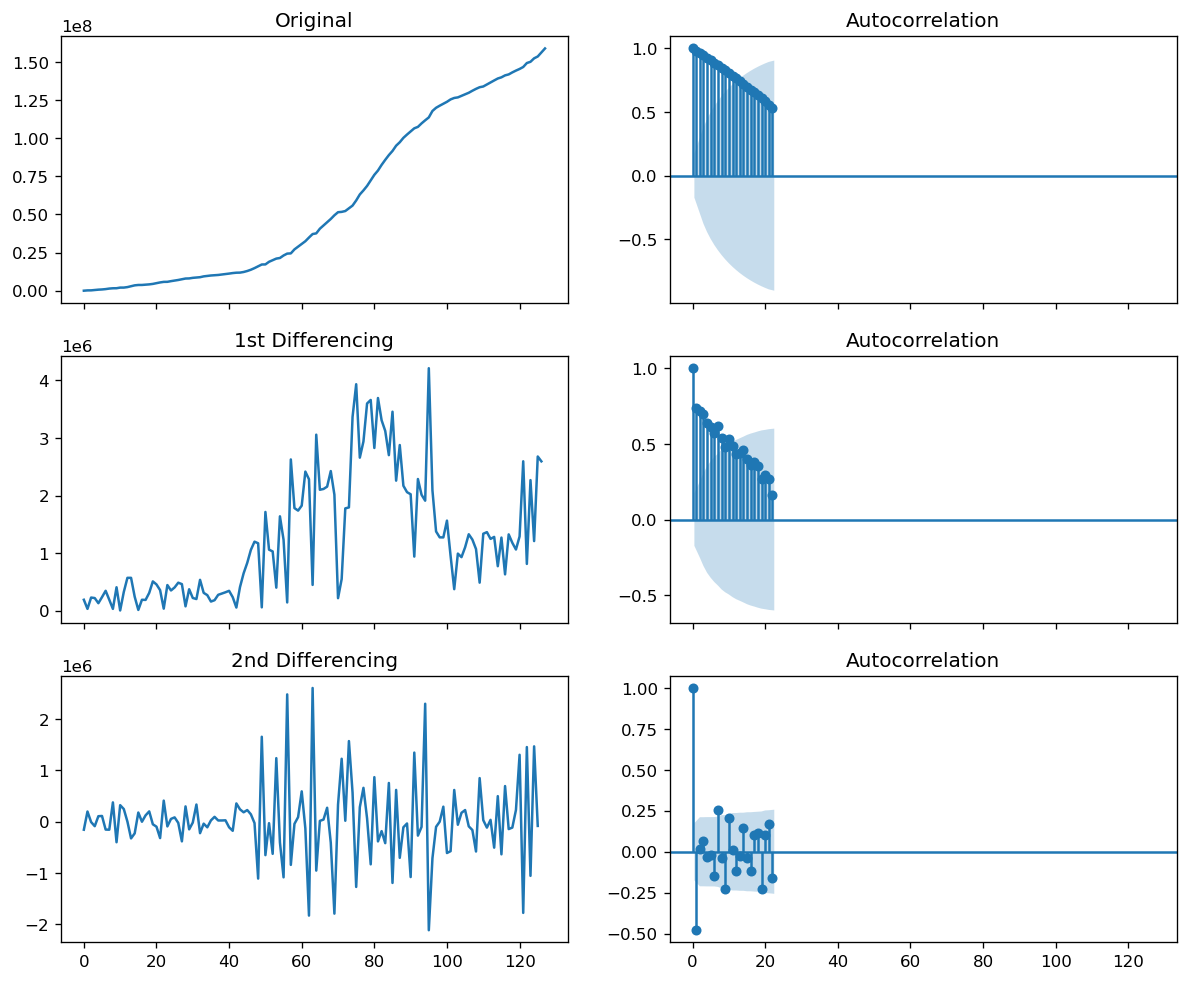

In [18]:
fig,axes = plt.subplots(3,2,sharex = True)
axes[0,0].plot(val);axes[0,0].set_title('Original')
plot_acf(val,ax = axes[0,1])

axes[1,0].plot(np.diff(val));axes[1,0].set_title('1st Differencing')
plot_acf(np.diff(val),ax = axes[1,1])
diffval = np.diff(val)

axes[2,0].plot(np.diff(diffval));axes[2,0].set_title('2nd Differencing')
plot_acf(np.diff(diffval),ax = axes[2,1])
plt.show()

# Using ARIMA Model

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
import pmdarima as pm

In [21]:
model = pm.auto_arima(val,startp = 1,startq = 1, test = 'adf', max_p = 3, max_q = 3, m = 1, d = None, seasonal = False, start_p = 0, D = 0, trace = True, error_action = 'ignore', suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3729.845, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3769.247, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3738.338, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3727.925, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3767.345, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3729.330, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3731.039, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3725.552, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=3727.341, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3727.572, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3736.590, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3729.525, Time=0.32 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.349 seconds


In [22]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1860.776
Date:                Mon, 31 May 2021   AIC                           3725.552
Time:                        17:43:34   BIC                           3731.225
Sample:                             0   HQIC                          3727.857
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6258      0.065     -9.586      0.000      -0.754      -0.498
sigma2       4.12e+11   1.05e-14   3.92e+25      0.000    4.12e+11    4.12e+11
Ljung-Box (L1) (Q):                   0.10   Jarque-

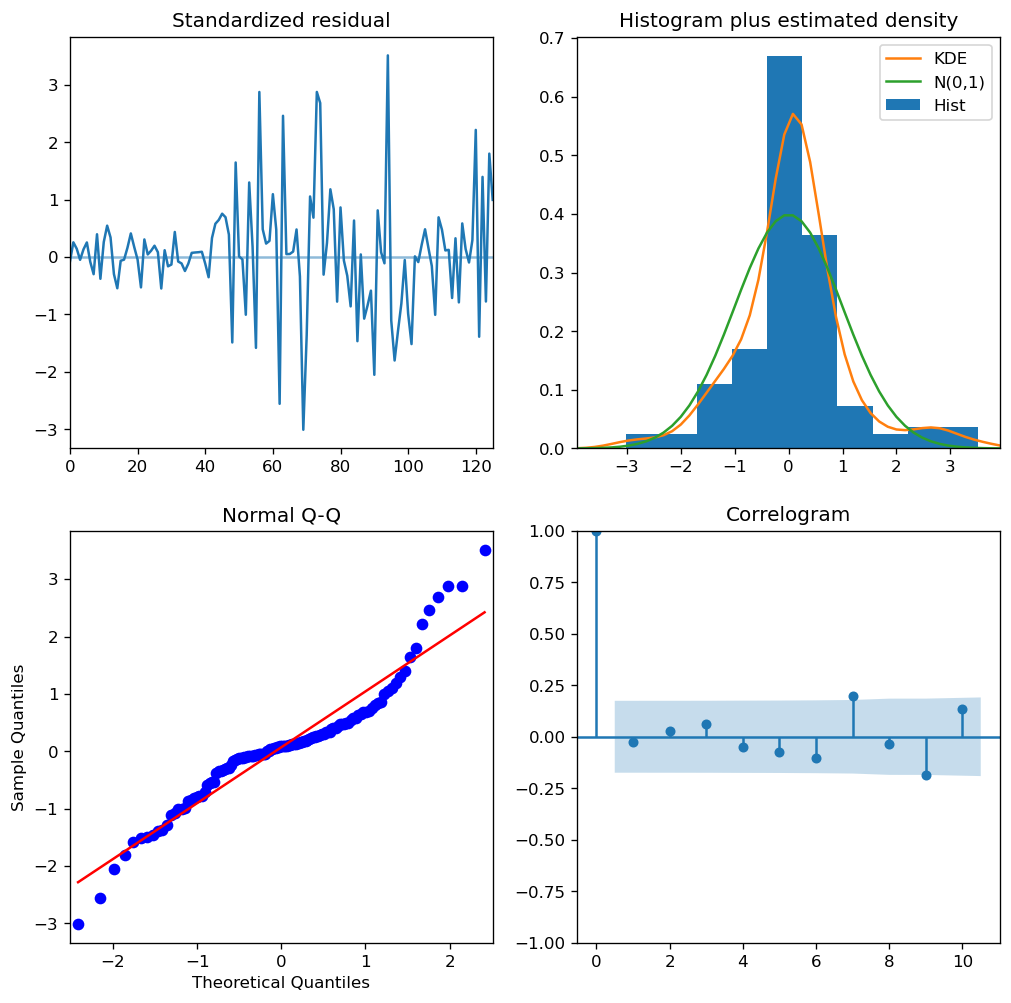

In [23]:
model.plot_diagnostics(figsize = (10,10))
plt.show()

# Forecast

In [24]:
num_periods = 10

In [25]:
fc, confint = model.predict(num_periods = num_periods , return_conf_int = True)

In [26]:
index_of_fc = np.arange(len(val),len(val) + num_periods)

In [27]:
fc_series = pd.Series(fc, index = index_of_fc)
lower_series = pd.Series(confint[:,0],index = index_of_fc)
upper_series = pd.Series(confint[:,1],index = index_of_fc)

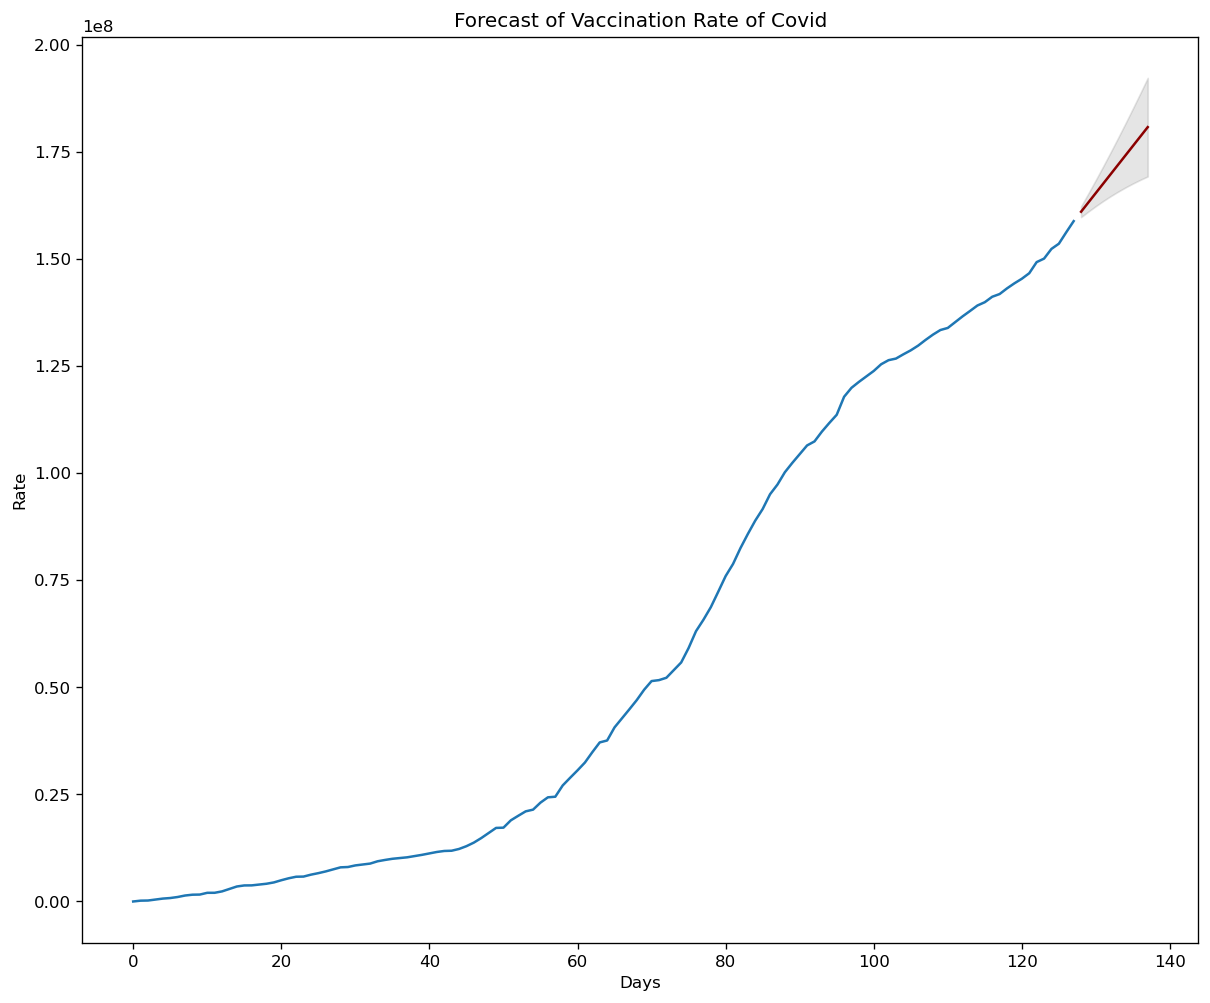

In [28]:
plt.plot(val)
plt.plot(fc_series,color = 'darkred')
plt.fill_between(lower_series.index,lower_series,upper_series,color = 'k' , alpha = .10)
plt.title("Forecast of Vaccination Rate of Covid")
plt.xlabel('Days')
plt.ylabel('Rate')
plt.show()